In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import scipy.stats as stats

In [2]:
file1 = "Resources/median_income_by_zip_code.csv"

In [3]:
df1 = pd.read_csv(file1, encoding='utf-8')

In [4]:
df1.head()

,zip_code,income
0,1001,"56,663"
1,1002,"49,853"
2,1003,"28,462"
3,1005,"75,423"
4,1007,"79,076"


In [5]:
df1['zip_code'] = df1['zip_code'].astype(str)

In [6]:
file2 = "Resources/restaurant_scores.csv"

In [7]:
df2 = pd.read_csv(file2, encoding='utf-8')

In [8]:
df2_limited_columns = df2[['business_name', 'business_postal_code', 'inspection_score']]
restaurantscleaned = df2_limited_columns.dropna(how='any')
restaurantscleaned.head()


,business_name,business_postal_code,inspection_score
0,Soo Fong Restaurant,94124,92.0
1,Dar Bar Pakistani/Indian Cusine,94109,86.0
2,Wise Sons Delicatessen,94102,92.0
3,DRAGON CITY BAKERY & CAFE,94110,84.0
4,Deli 23,94110,92.0


In [9]:
avgscore = restaurantscleaned.groupby('business_postal_code', as_index=False).mean()

In [10]:
avgscore.head()

,business_postal_code,inspection_score
0,00000,93.0
1,64110,85.0
2,92672,87.0
3,94013,96.0
4,94014,98.0


In [11]:
zipvalcounts = pd.DataFrame(restaurantscleaned['business_postal_code'].value_counts())
zipvalcounts_cleaned = zipvalcounts.reset_index()
zipvalcounts_cleaned.head()

,index,business_postal_code
0,94110,4450
1,94103,3405
2,94133,3014
3,94109,3000
4,94102,2759


In [12]:
ziprenamed = zipvalcounts_cleaned.rename(index=str, columns={"index": "zip_code", "business_postal_code": "inspection_count"})
ziprenamed.head()

,zip_code,inspection_count
0,94110,4450
1,94103,3405
2,94133,3014
3,94109,3000
4,94102,2759


In [13]:
avgscore_formerge = avgscore.rename(index=str, columns={"business_postal_code": "zip_code"})
avgscore_formerge['zip_code'] = avgscore_formerge['zip_code'].astype(str)
avgscore_formerge.head()

,zip_code,inspection_score
0,00000,93.0
1,64110,85.0
2,92672,87.0
3,94013,96.0
4,94014,98.0


In [14]:
df_fordrop = pd.merge(avgscore_formerge, df1, on="zip_code", how="left")
df_fordrop.head()

,zip_code,inspection_score,income
0,00000,93.0,NaN
1,64110,85.0,"41,624"
2,92672,87.0,"71,928"
3,94013,96.0,NaN
4,94014,98.0,"75,187"


In [15]:
df_cleaned = df_fordrop.dropna(how='any')
df_cleaned['income'] = df_cleaned['income'].replace(",","", regex=True).astype(float)
df_sorted = df_cleaned.sort_values(by='income', ascending=True)

C:\Users\Iam\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


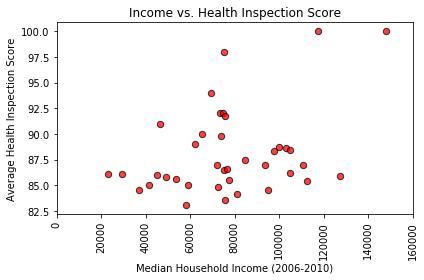

In [16]:
plt.scatter(df_sorted['income'], df_sorted['inspection_score'], marker="o", facecolors="red", edgecolors="black",
            s=40, alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Average Health Inspection Score')
plt.title('Income vs. Health Inspection Score')
plt.xlim(0, 160000)
plt.tight_layout()
plt.savefig("ScatterUniformSize.png")

In [17]:
mergewithcount = pd.merge(df_sorted, ziprenamed, on="zip_code", how="left")
mergewithcount.head()

,zip_code,inspection_score,income,inspection_count
0,94104,86.066590,23165.0,871
1,94102,86.088800,29613.0,2759
2,94108,84.524796,37052.0,1593
3,64110,85.000000,41624.0,4
4,94133,86.050100,45203.0,3014


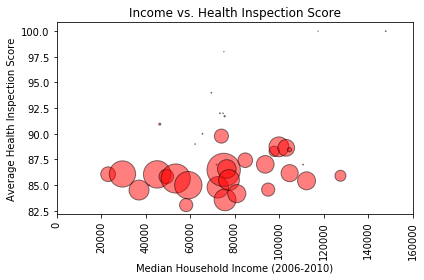

In [18]:
plt.scatter(mergewithcount['income'], mergewithcount['inspection_score'], marker="o", facecolors="red", edgecolors="black",
            s=mergewithcount['inspection_count']/4, alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Average Health Inspection Score')
plt.title('Income vs. Health Inspection Score')
plt.xlim(0, 160000)
plt.tight_layout()
plt.savefig("ScatterVariableSize.png")

In [19]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 160000]
group_labels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k', '120k+']
mergewithcount['income_binned'] = pd.cut(mergewithcount['income'], bins, labels=group_labels)
mergewithcount.head()

,zip_code,inspection_score,income,inspection_count,income_binned
0,94104,86.066590,23165.0,871,20k - 40k
1,94102,86.088800,29613.0,2759,20k - 40k
2,94108,84.524796,37052.0,1593,20k - 40k
3,64110,85.000000,41624.0,4,40k - 60k
4,94133,86.050100,45203.0,3014,40k - 60k


In [20]:
binned_income = mergewithcount.groupby('income_binned', as_index=False).sum()
binned_income

,income_binned,inspection_score,income,inspection_count
0,0 - 20k,0.000000,0.0,0
1,20k - 40k,256.680186,89830.0,5223
2,40k - 60k,601.549286,353515.0,10989
3,60k - 80k,1250.414281,1019592.0,12159
4,80k - 100k,520.227786,552420.0,6139
5,100k - 120k,535.679454,653260.0,3668
6,120k+,185.913580,275511.0,489


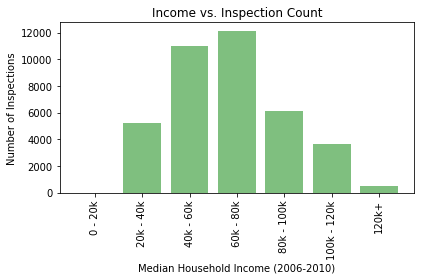

In [21]:
plt.bar(binned_income['income_binned'], binned_income['inspection_count'], color='green', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Number of Inspections')
plt.title('Income vs. Inspection Count')
plt.tight_layout()
plt.savefig("incomeinspectioncount.png")

In [22]:
file = "Resources/all_data_cleaned.csv"

In [23]:
df = pd.read_csv(file, encoding='utf-8')

In [24]:
df.head()

,Unnamed: 0,restaurant,address,recent_health_score,recent_health_risk,average_health_score,zipcode,yelp_business_id,rating,price,review_count,category_1,category_2,category_3,distance,cuisine,median_income,zip_lat,zip_lng
0,0,Norman's Ice Cream and Freezes,2801 Leavenworth St,96,Low Risk,96.000000,94133,sfAIpzEC8ywpy36YhzikmQ,4.5,$,289.0,Ice Cream & Frozen Yogurt,Coffee & Tea,Juice Bars & Smoothies,8.031888,Other,45203,37.804531,-122.410852
1,1,Chowders,Pier 39 Space A3,98,Low Risk,94.500000,94133,oic-xcRpi-yXG3KZ4go0mg,3.5,$$,768.0,Seafood,Fish & Chips,Soup,57.334700,Other,45203,37.804531,-122.410852
2,2,XOX Truffles,754 Columbus Ave,94,Moderate Risk,94.000000,94133,qkHlhvv6DrCkvY54ogcPiA,4.5,$,604.0,Chocolatiers & Shops,Coffee & Tea,NaN,3.286580,Other,45203,37.804531,-122.410852
3,3,Centerfolds,391 Broadway St,90,Low Risk,90.857143,94133,6Ki5PvDCebTkCRkGEXD1qw,3.5,$$,151.0,Cabaret,Strip Clubs,NaN,7.262056,Other,45203,37.804531,-122.410852
4,4,Caffe Puccini,411 Columbus Ave,90,Low Risk,90.000000,94133,uzqUJiCHUqV2c3PnvSsqeQ,4.0,$,966.0,Coffee & Tea,Desserts,Sandwiches,25.578495,Other,45203,37.804531,-122.410852


In [25]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 160000]
group_labels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k', '120k+']
df['income_binned'] = pd.cut(df['median_income'], bins, labels=group_labels)
df.head()

,Unnamed: 0,restaurant,address,recent_health_score,recent_health_risk,average_health_score,zipcode,yelp_business_id,rating,price,review_count,category_1,category_2,category_3,distance,cuisine,median_income,zip_lat,zip_lng,income_binned
0,0,Norman's Ice Cream and Freezes,2801 Leavenworth St,96,Low Risk,96.000000,94133,sfAIpzEC8ywpy36YhzikmQ,4.5,$,289.0,Ice Cream & Frozen Yogurt,Coffee & Tea,Juice Bars & Smoothies,8.031888,Other,45203,37.804531,-122.410852,40k - 60k
1,1,Chowders,Pier 39 Space A3,98,Low Risk,94.500000,94133,oic-xcRpi-yXG3KZ4go0mg,3.5,$$,768.0,Seafood,Fish & Chips,Soup,57.334700,Other,45203,37.804531,-122.410852,40k - 60k
2,2,XOX Truffles,754 Columbus Ave,94,Moderate Risk,94.000000,94133,qkHlhvv6DrCkvY54ogcPiA,4.5,$,604.0,Chocolatiers & Shops,Coffee & Tea,NaN,3.286580,Other,45203,37.804531,-122.410852,40k - 60k
3,3,Centerfolds,391 Broadway St,90,Low Risk,90.857143,94133,6Ki5PvDCebTkCRkGEXD1qw,3.5,$$,151.0,Cabaret,Strip Clubs,NaN,7.262056,Other,45203,37.804531,-122.410852,40k - 60k
4,4,Caffe Puccini,411 Columbus Ave,90,Low Risk,90.000000,94133,uzqUJiCHUqV2c3PnvSsqeQ,4.0,$,966.0,Coffee & Tea,Desserts,Sandwiches,25.578495,Other,45203,37.804531,-122.410852,40k - 60k


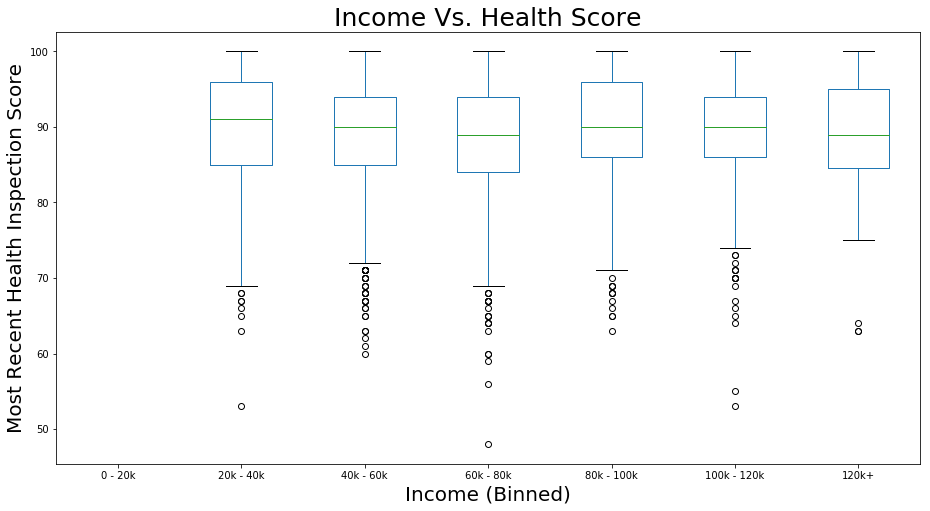

In [26]:
incomevshealth = df.boxplot("recent_health_score", by="income_binned", figsize=(15, 8), grid=False)
incomevshealth.set_xlabel("Income (Binned)", fontsize=20)
incomevshealth.set_ylabel("Most Recent Health Inspection Score", fontsize=20)
plt.title("Income Vs. Health Score", fontsize=25)
plt.suptitle("")
plt.savefig("incomevshealthscoreboxplot.png")

In [27]:
pregroup1 = df.loc[(df["income_binned"] == "20k - 40k")]
pregroup2 = df.loc[(df["income_binned"] == "40k - 60k")]
pregroup3 = df.loc[(df["income_binned"] == "60k - 80k")]
pregroup4 = df.loc[(df["income_binned"] == "80k - 100k")]
pregroup5 = df.loc[(df["income_binned"] == "100k - 120k")]
pregroup6 = df.loc[(df["income_binned"] == "120k+")]

group1 = pregroup1['recent_health_score']
group2 = pregroup2['recent_health_score']
group3 = pregroup3['recent_health_score']
group4 = pregroup4['recent_health_score']
group5 = pregroup5['recent_health_score']
group6 = pregroup6['recent_health_score']

In [28]:
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=4.558454072072795, pvalue=0.000380422865116031)

In [29]:
#Redo of presentation charts using new cleaned dataframe

In [30]:
zipvalcounts = pd.DataFrame(df['zipcode'].value_counts())
zipvalcounts.head()

,zipcode
94110,374
94103,297
94102,265
94133,259
94109,244


In [31]:
avg_healthscore = df.groupby('zipcode').mean()
df_sorted = avg_healthscore.sort_values(by='median_income', ascending=True)
df_sorted = df_sorted.reset_index()
df_sorted

,zipcode,Unnamed: 0,recent_health_score,average_health_score,rating,review_count,distance,median_income,zip_lat,zip_lng
0,94104,1725.0,89.234568,88.021733,3.771605,261.691358,10.255812,23165.0,37.791412,-122.402129
1,94102,1552.0,89.890566,89.238106,3.775472,566.256604,8.884341,29613.0,37.779584,-122.419339
2,94108,1347.5,89.868056,88.288953,3.715278,443.708333,8.924907,37052.0,37.792016,-122.408584
3,90012,3507.5,94.400000,93.961905,3.000000,239.000000,19.836691,39775.0,34.065975,-118.238642
4,94133,129.0,89.262548,88.517845,3.774131,602.525097,9.615345,45203.0,37.804531,-122.410852
5,94130,3501.0,92.333333,91.952381,4.000000,214.666667,7.702219,46382.0,37.820688,-122.369537
6,94124,2130.5,89.161290,88.927974,4.024194,96.951613,10.731306,49309.0,37.728895,-122.382779
7,94103,1914.0,88.760943,88.014189,3.843434,445.242424,10.152261,53548.0,37.773152,-122.411164
8,94134,2081.0,83.648649,83.023697,3.635135,102.081081,7.835064,58244.0,37.721046,-122.413555
9,94109,3117.5,89.245902,88.318253,3.862705,515.893443,8.085413,59205.0,37.795388,-122.422444


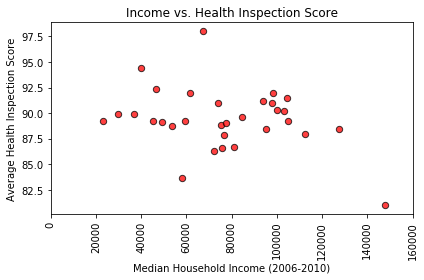

In [32]:
plt.scatter(df_sorted['median_income'], df_sorted['recent_health_score'], marker="o", facecolors="red", edgecolors="black",
            s=40, alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Average Health Inspection Score')
plt.title('Income vs. Health Inspection Score')
plt.xlim(0, 160000)
plt.tight_layout()
plt.savefig("ScatterUniformSize2.png")

In [33]:
ziprenamed = ziprenamed.rename(index=str, columns={"zip_code": "zipcode"})
ziprenamed.head()

,zipcode,inspection_count
0,94110,4450
1,94103,3405
2,94133,3014
3,94109,3000
4,94102,2759


In [34]:
ziprenamed['zipcode'] = ziprenamed['zipcode'].astype(str)
ziprenamed.head()

,zipcode,inspection_count
0,94110,4450
1,94103,3405
2,94133,3014
3,94109,3000
4,94102,2759


In [35]:
df_sorted['zipcode'] = df_sorted['zipcode'].astype(str)

In [36]:
df_withcount = pd.merge(df_sorted, ziprenamed, on="zipcode", how="left")
df_withcount.head()

,zipcode,Unnamed: 0,recent_health_score,average_health_score,rating,review_count,distance,median_income,zip_lat,zip_lng,inspection_count
0,94104,1725.0,89.234568,88.021733,3.771605,261.691358,10.255812,23165.0,37.791412,-122.402129,871.0
1,94102,1552.0,89.890566,89.238106,3.775472,566.256604,8.884341,29613.0,37.779584,-122.419339,2759.0
2,94108,1347.5,89.868056,88.288953,3.715278,443.708333,8.924907,37052.0,37.792016,-122.408584,1593.0
3,90012,3507.5,94.400000,93.961905,3.000000,239.000000,19.836691,39775.0,34.065975,-118.238642,NaN
4,94133,129.0,89.262548,88.517845,3.774131,602.525097,9.615345,45203.0,37.804531,-122.410852,3014.0


In [37]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 160000]
group_labels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k', '120k+']
df_withcount['income_binned'] = pd.cut(df_withcount['median_income'], bins, labels=group_labels)
df_withcount.head()

,zipcode,Unnamed: 0,recent_health_score,average_health_score,rating,review_count,distance,median_income,zip_lat,zip_lng,inspection_count,income_binned
0,94104,1725.0,89.234568,88.021733,3.771605,261.691358,10.255812,23165.0,37.791412,-122.402129,871.0,20k - 40k
1,94102,1552.0,89.890566,89.238106,3.775472,566.256604,8.884341,29613.0,37.779584,-122.419339,2759.0,20k - 40k
2,94108,1347.5,89.868056,88.288953,3.715278,443.708333,8.924907,37052.0,37.792016,-122.408584,1593.0,20k - 40k
3,90012,3507.5,94.400000,93.961905,3.000000,239.000000,19.836691,39775.0,34.065975,-118.238642,NaN,20k - 40k
4,94133,129.0,89.262548,88.517845,3.774131,602.525097,9.615345,45203.0,37.804531,-122.410852,3014.0,40k - 60k


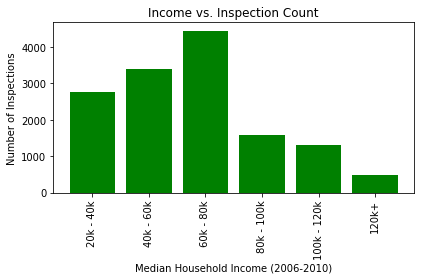

In [38]:
plt.bar(df_withcount['income_binned'], df_withcount['inspection_count'], color='green', alpha=1, align="center")
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Number of Inspections')
plt.title('Income vs. Inspection Count')
plt.tight_layout()
plt.savefig("incomeinspectioncount2.png")

In [39]:
df_dropped = df_withcount.dropna(how='any')
df_dropped.head()

,zipcode,Unnamed: 0,recent_health_score,average_health_score,rating,review_count,distance,median_income,zip_lat,zip_lng,inspection_count,income_binned
0,94104,1725.0,89.234568,88.021733,3.771605,261.691358,10.255812,23165.0,37.791412,-122.402129,871.0,20k - 40k
1,94102,1552.0,89.890566,89.238106,3.775472,566.256604,8.884341,29613.0,37.779584,-122.419339,2759.0,20k - 40k
2,94108,1347.5,89.868056,88.288953,3.715278,443.708333,8.924907,37052.0,37.792016,-122.408584,1593.0,20k - 40k
4,94133,129.0,89.262548,88.517845,3.774131,602.525097,9.615345,45203.0,37.804531,-122.410852,3014.0,40k - 60k
5,94130,3501.0,92.333333,91.952381,4.000000,214.666667,7.702219,46382.0,37.820688,-122.369537,17.0,40k - 60k


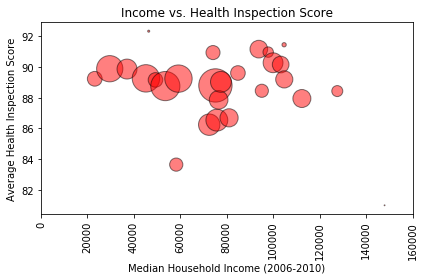

In [40]:
plt.scatter(df_dropped['median_income'], df_dropped['recent_health_score'], marker="o", facecolors="red", edgecolors="black",
            s=df_dropped['inspection_count']/4, alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Average Health Inspection Score')
plt.title('Income vs. Health Inspection Score')
plt.xlim(0, 160000)
plt.tight_layout()
plt.savefig("ScatterVariableSize2.png")

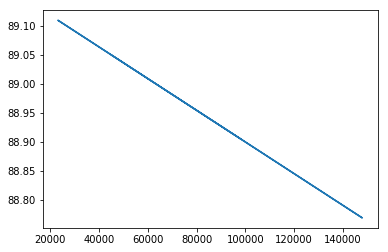

In [41]:
x = df['median_income']
y = df['recent_health_score']
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')
plt.savefig('regressionline.png')

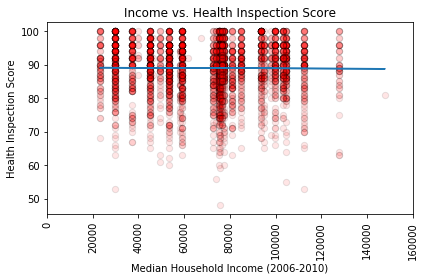

In [42]:
plt.scatter(df['median_income'], df['recent_health_score'], marker="o", facecolors="red", edgecolors="black",
            s=40, alpha=0.1)
plt.xticks(rotation=90)
plt.xlabel('Median Household Income (2006-2010)')
plt.ylabel('Health Inspection Score')
plt.title('Income vs. Health Inspection Score')
plt.xlim(0, 160000)
plt.tight_layout()
plt.plot(x, b + m * x, '-')
plt.savefig("Scatterwithregressionline.png")

In [43]:
stats.ttest_1samp(df['recent_health_score'], df['recent_health_score'].mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [44]:
df['recent_health_score'].mean()

88.98065433854907